# Hypothesis Testing: Matched or Paired Samples T-Test

https://www.youtube.com/watch?v=JiQR0lHLe74

In [1]:
import numpy as np
from scipy.stats import t
from matplotlib import pyplot

In [2]:
data1 = np.array([185, 192, 206, 177, 225, 168, 256, 239, 199, 218])
data2 = np.array([169, 187, 193, 176, 194, 171, 228, 217, 204, 195])
n = len(data1)

In [3]:
alpha = 0.05

$H_0: \mu_d \ge 0$

$H_a: \mu_d \lt 0$

In [4]:
diff = data2 - data1

sample_diff_mean = np.sum(diff) / len(data1)

print(diff, sample_diff_mean)

[-16  -5 -13  -1 -31   3 -28 -22   5 -23] -13.1


In [5]:
denom = len(data1) - 1

std = np.sqrt(np.sum(np.square(diff - sample_diff_mean)) / denom)

std

13.02518927139086

In [6]:
degrees_freedom = n - 1

In [7]:
critical_t_value = t.ppf(alpha, degrees_freedom)
critical_t_value

-1.8331129326536337

In [8]:
population_mean_diff = 0

t_value = (sample_diff_mean - population_mean_diff) / (std / np.sqrt(n))
t_value

-3.180440336417639

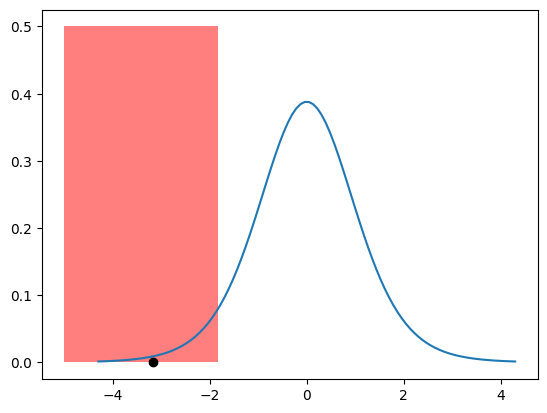

In [9]:
x = np.linspace(t.ppf(0.001, degrees_freedom), t.ppf(0.999, degrees_freedom), 100)
pyplot.plot(x, t.pdf(x, degrees_freedom))
pyplot.fill_betweenx([0, 0.5], -5, critical_t_value, facecolor='red', alpha=0.5)

pyplot.plot([t_value], [0], marker='o', color='black')

Reject $H_0$

## Confidence Interval

In [10]:
lo = sample_diff_mean - np.abs(critical_t_value * std / np.sqrt(n))
hi = sample_diff_mean + np.abs(critical_t_value * std / np.sqrt(n))

assert(lo < hi)
(lo, hi)

(-20.650457445402374, -5.5495425545976245)

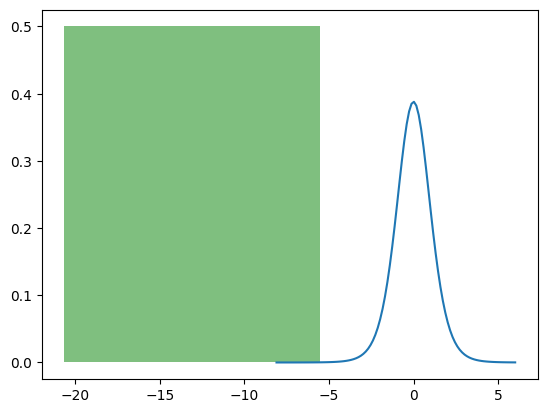

In [11]:
x = np.linspace(t.ppf(0.00001, degrees_freedom), t.ppf(0.9999, degrees_freedom), 100)
pyplot.plot(x, t.pdf(x, degrees_freedom))
pyplot.fill_betweenx([0, 0.5], lo, hi, facecolor='green', alpha=0.5)

We are 95% confident that the mean difference ($\mu_d$) is somewhere in that range. This gives us further reason to reject $H_0$, which claims $\mu_d \ge 0$.